<a href="https://colab.research.google.com/github/mostafanabiehMourad/Tensorflow-2.0/blob/master/Tensorflow_2_0_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Tensorflow 2.0 Mostafa Nabieh](https://automaticaddison.com/wp-content/uploads/2019/11/tensorflow_2-1200x600.png)

#Install Tensorflow 2.0

Download and install TensorFlow 2. Import TensorFlow into your program:



In [0]:
!!pip install tensorflow==2.0.0

['Collecting tensorflow==2.0.0',
 '\x1b[?25l  Downloading https://files.pythonhosted.org/packages/46/0f/7bd55361168bb32796b360ad15a25de6966c9c1beb58a8e30c01c8279862/tensorflow-2.0.0-cp36-cp36m-manylinux2010_x86_64.whl (86.3MB)',
 '',
 '\x1b[K     |                                | 10kB 21.1MB/s eta 0:00:05',
 '\x1b[K     |                                | 20kB 2.4MB/s eta 0:00:36',
 '\x1b[K     |                                | 30kB 2.9MB/s eta 0:00:30',
 '\x1b[K     |                                | 40kB 2.8MB/s eta 0:00:31',
 '\x1b[K     |                                | 51kB 3.2MB/s eta 0:00:27',
 '\x1b[K     |                                | 61kB 3.8MB/s eta 0:00:23',
 '\x1b[K     |                                | 71kB 3.9MB/s eta 0:00:23',
 '\x1b[K     |                                | 81kB 4.4MB/s eta 0:00:20',
 '\x1b[K     |                                | 92kB 4.2MB/s eta 0:00:21',
 '\x1b[K     |                                | 102kB 4.2MB/s eta 0:00:21',
 '\x1b[K     |

#Classification of MNIST Dreams with Convolutional Neural Networks
let's build a convolutional neural network (CNN) classifier to classify images of handwritten digits in the MNIST dataset with a twist where we test our classifier on high-resolution hand-written digits from outside the dataset.

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
print(tf.__version__)

2.0.0


The MNIST dataset containss 70,000 grayscale images of handwritten digits at a resolution of 28 by 28 pixels. The task is to take one of these images as input and predict the most likely digit contained in the image (along with a relative confidence in this prediction):

<img src="https://i.imgur.com/ITrm9x4.png" width="500px">

Now, we load the dataset. The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of integers, ranging from 0 to 9.

In [0]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print("---------------before reshape single channel-------------")
print(x_train.shape)
print(x_test.shape)
# reshape images to specify that it's a single channel
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
#Convert the samples from integers to floating
print("---------------after reshape single channel-------------")

print(x_train.shape)
print(x_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
---------------before reshape single channel-------------
(60000, 28, 28)
(10000, 28, 28)
---------------after reshape single channel-------------
(60000, 28, 28, 1)
(10000, 28, 28, 1)


#Prerequisites


In [0]:
# Commonly used modules
import numpy as np
import os
import sys

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib

# Preprocess images 
We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, we divide the values by 255. It's important that the training set and the testing set are preprocessed in the same way:

In [0]:
def preprocess_images(imgs): # should work for both a single image and multiple images
    sample_img = imgs if len(imgs.shape) == 2 else imgs[0]
    assert sample_img.shape in [(28, 28, 1), (28, 28)], sample_img.shape # make sure images are 28x28 and single-channel (grayscale)
    return imgs / 255.0

x_train = preprocess_images(x_train)
x_test = preprocess_images(x_test)

#Display 10 Image

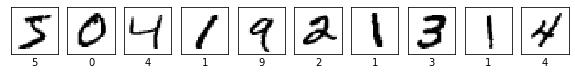

In [0]:
plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

# Build the model





Building the neural network requires configuring the layers of the model, then compiling the model. In many cases, this can be reduced to simply stacking together layers:

In [0]:
model = tf.keras.models.Sequential([
# 32 convolution filters used each of size 3x3                                   
tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28, 28, 1)),
# 64 convolution filters used each of size 3x3
tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
# choose the best features via pooling
tf.keras.layers.MaxPooling2D((2, 2)),
# randomly turn neurons on and off to improve convergence
tf.keras.layers.Dropout(0.25),
# flatten since too many dimensions, we only want a classification output
tf.keras.layers.Flatten(),
# fully connected to get all relevant data
tf.keras.layers.Dense(128, activation='relu'),
# one more dropout
tf.keras.layers.Dropout(0.5),
# output a softmax to squash the matrix into output probabilities
tf.keras.layers.Dense(10, activation='softmax')
                                    ])

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* - measures how accurate the model is during training, we want to minimize this with the optimizer.
* *Optimizer* - how the model is updated based on the data it sees and its loss function.
* *Metrics* - used to monitor the training and testing steps. "accuracy" is the fraction of images that are correctly classified.

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model—in this example, the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. We ask the model to make predictions about a test set—in this example, the `test_images` array. We verify that the predictions match the labels from the `test_labels` array. 

To start training,  call the `model.fit` method—the model is "fit" to the training data:

In [0]:
history = model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 159s 3ms/sample - loss: 0.1904 - accuracy: 0.9425
Epoch 2/5
60000/60000 [==============================] - 157s 3ms/sample - loss: 0.0805 - accuracy: 0.9762
Epoch 3/5
60000/60000 [==============================] - 158s 3ms/sample - loss: 0.0618 - accuracy: 0.9814
Epoch 4/5
60000/60000 [==============================] - 159s 3ms/sample - loss: 0.0483 - accuracy: 0.9853
Epoch 5/5
60000/60000 [==============================] - 160s 3ms/sample - loss: 0.0411 - accuracy: 0.9874


### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [0]:
print(x_test.shape)

test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

(10000, 28, 28, 1)
10000/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Often times, the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of *overfitting*. In our case, the accuracy is better at 99.19%! This is, in part, due to successful regularization accomplished with the Dropout layers.

### Make predictions

With the model trained, we can use it to make predictions about some images. Let's step outside the MNIST dataset for that and go with the beautiful high-resolution images generated by a mixture of CPPN, GAN, VAE. See [great blog post by hardmaru](http://blog.otoro.net/2016/04/01/generating-large-images-from-latent-vectors/) for the source data and a description of how these morphed animations are generated:

![MNIST dream](https://i.imgur.com/OrUJs9V.gif)

In [0]:
this_repo_url = 'https://github.com/lexfridman/mit-deep-learning/raw/master/'
this_tutorial_url = this_repo_url + 'tutorial_deep_learning_basics'

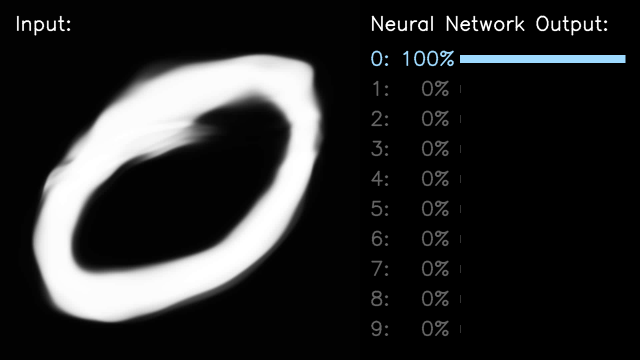

In [0]:
mnist_dream_path = 'images/mnist_dream.mp4'
mnist_prediction_path = 'images/mnist_dream_predicted.mp4'

# download the video if running in Colab
if not os.path.isfile(mnist_dream_path): 
    print('downloading the sample video...')
    vid_url = this_tutorial_url + '/' + mnist_dream_path
    
    mnist_dream_path = urllib.request.urlretrieve(vid_url)[0]
                                                                                                  
def cv2_imshow(img):
    ret = cv2.imencode('.png', img)[1].tobytes() 
    img_ip = IPython.display.Image(data=ret)
    IPython.display.display(img_ip)

cap = cv2.VideoCapture(mnist_dream_path) 
vw = None
frame = -1 # counter for debugging (mostly), 0-indexed

# go through all the frames and run our classifier on the high res MNIST images as they morph from number to number
while True: # should 481 frames
    frame += 1
    ret, img = cap.read()
    if not ret: break
               
    assert img.shape[0] == img.shape[1] # should be a square
    if img.shape[0] != 720:
        img = cv2.resize(img, (720, 720))
       
    #preprocess the image for prediction
    img_proc = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_proc = cv2.resize(img_proc, (28, 28))
    img_proc = preprocess_images(img_proc)
    img_proc = 1 - img_proc # inverse since training dataset is white text with black background

    net_in = np.expand_dims(img_proc, axis=0) # expand dimension to specify batch size of 1
    net_in = np.expand_dims(net_in, axis=3) # expand dimension to specify number of channels
    
    preds = model.predict(net_in)[0]
    guess = np.argmax(preds)
    perc = np.rint(preds * 100).astype(int)
    
    img = 255 - img
    pad_color = 0
    img = np.pad(img, ((0,0), (0,1280-720), (0,0)), mode='constant', constant_values=(pad_color))  
    
    line_type = cv2.LINE_AA
    font_face = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1.3        
    thickness = 2
    x, y = 740, 60
    color = (255, 255, 255)
    
    text = "Neural Network Output:"
    cv2.putText(img, text=text, org=(x, y), fontScale=font_scale, fontFace=font_face, thickness=thickness,
                    color=color, lineType=line_type)
    
    text = "Input:"
    cv2.putText(img, text=text, org=(30, y), fontScale=font_scale, fontFace=font_face, thickness=thickness,
                    color=color, lineType=line_type)   
        
    y = 130
    for i, p in enumerate(perc):
        if i == guess: color = (255, 218, 158)
        else: color = (100, 100, 100)
            
        rect_width = 0
        if p > 0: rect_width = int(p * 3.3)
        
        rect_start = 180
        cv2.rectangle(img, (x+rect_start, y-5), (x+rect_start+rect_width, y-20), color, -1)

        text = '{}: {:>3}%'.format(i, int(p))
        cv2.putText(img, text=text, org=(x, y), fontScale=font_scale, fontFace=font_face, thickness=thickness,
                    color=color, lineType=line_type)
        y += 60
    
    # if you don't want to save the output as a video, set this to False
    save_video = True
    
    if save_video:
        if vw is None:
            codec = cv2.VideoWriter_fourcc(*'DIVX')
            vid_width_height = img.shape[1], img.shape[0]
            vw = cv2.VideoWriter(mnist_prediction_path, codec, 30, vid_width_height)
        # 15 fps above doesn't work robustly so we right frame twice at 30 fps
        vw.write(img)
        vw.write(img)
    
    # scale down image for display
    img_disp = cv2.resize(img, (0,0), fx=0.5, fy=0.5)
    cv2_imshow(img_disp)
    IPython.display.clear_output(wait=True)
        
cap.release()
if vw is not None:
    vw.release()

The above shows the prediction of the network by choosing the neuron with the highest output. While the output layer values add 1 to one, these do not reflect well-calibrated measures of "uncertainty". Often, the network is overly confident about the top choice that does not reflect a learned measure of probability. If everything ran correctly you should get an animation like this:

![MNIST dream predictions](https://i.imgur.com/eMF9FOG.gif)

# Save weights
You saw how to load the weights into a model. Manually saving them is just as simple with the Model.save_weights method. By default, tf.keras—and save_weights in particular—uses the TensorFlow checkpoint format with a .ckpt extension (saving in HDF5 with a .h5 extension is covered in the Save and serialize models guide):

In [0]:
model.save_weights('Tensorflow mnist.h5')

## Acknowledgements

The contents of this tutorial is based on and inspired by the work of [TensorFlow team](https://www.tensorflow.org/tutorials/quickstart/beginner),  [MIT Human-Centered AI team](https://hcai.mit.edu)

```
# This is formatted as code
```

